# NLP Simple Modeling

import neccessary libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay 
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
# !pip install --upgrade scikit-learn

from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.over_sampling import SMOTE




In [2]:
#load cleaned dataset


In [3]:
df = pd.read_csv("./Data/Cleaned_tweet_dataset.csv")


# Binary Classification Simple Model

Start with a binary classification simple model only consider positive and negative sentiments for the target.

In [4]:
# Create a new dataframe for binary classification
df_binary = df [df['Emotion'] != 'Neutral']


In [5]:
df_binary.head()


,Unnamed: 0,Tweet,Brand/Product,Emotion,Brand
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple
3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple
4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google


In [6]:
#binarizing emotion column
emotion_dict = {'Negative': 0, 'Positive': 1}
df_binary['Emotion'] = df_binary['Emotion'].map(emotion_dict)


<ipython-input-6-c21124fb8c6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['Emotion'] = df_binary['Emotion'].map(emotion_dict)


In [7]:
df_binary['Emotion'].value_counts(normalize= True)


1    0.839346
0    0.160654
Name: Emotion, dtype: float64

In [8]:
# we got class imbalance in our dataset so will use SMOTE to increase minority counts


In [9]:
# Define X, y
# Train-test-split
X = df_binary['Tweet'] # Tweet content is our feature
y = df_binary['Emotion'] #binary target for negative and positive emotions

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) # split data into training and testing


Dummy Classifier as a baseline to evaluate other model performances

In [10]:
tokenizer = TweetTokenizer()
# preserve_case = False, strip_handles = True

In [11]:
stop_lst = stopwords.words('english') + list(string.punctuation) + ['...','#sxsw', '’', '#sxswi', 'sxsw', "''", 'link','rt'] + ['ipad', 'apple', 'google', 'iphone', '#apple', 
                               '#google', '#ipad', '#iphone', 'android']

In [47]:
# Create a pipeline 
dummy_pipe = ImPipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)), # NLP preprocessing: tokenize, remove stopwords, punctunations, lowercase
                     ('smote', SMOTE(sampling_strategy = 1, random_state = 42)), # use SMOTE to get 1:1 ratio for both classes
                     ('dumm', DummyClassifier(random_state=42))]) # first attempt: dummy classifier

dummy_pipe.fit(X_train, y_train)





/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7facefac7700>>)),
                ('smote', SMOTE(random_state=42, sampling_strategy=1)),
                ('dumm', DummyClassifier(random_state=42))])

In [48]:
y_pred = dummy_pipe.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.15      1.00      0.27       137
           1       0.00      0.00      0.00       750

    accuracy                           0.15       887
   macro avg       0.08      0.50      0.13       887
weighted avg       0.02      0.15      0.04       887



/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [49]:
accuracy_score(y_test, y_pred)

0.1544532130777903

In [50]:
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[137,   0],
       [750,   0]])

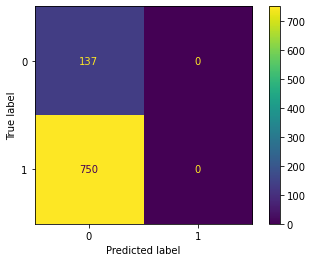

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

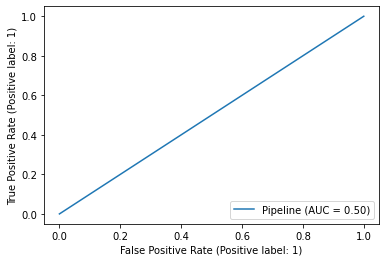

In [52]:
RocCurveDisplay.from_estimator( dummy_pipe, X_test, y_test )

In [53]:
# This dummy classifier model performs very bad with a 0.154 accuracy. AUC score of 0.5.
# Will see how Random forest perform with similar pipeline steps!

# Random Forest Baseline Model

In [54]:
# Create a pipeline for random forest.
rfc_pipe = ImPipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)), # NLP preprocessing: tokenize, remove stopwords, punctunations, lowercase
                     ('smote', SMOTE(sampling_strategy = 1, random_state = 42)), # use SMOTE to get 1:1 ratio for both classes
                     ('rfc', RandomForestClassifier(random_state=42))]) # first attempt: Random forest classifier

rfc_pipe.fit(X_train, y_train) 

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7facefac7700>>)),
                ('smote', SMOTE(random_state=42, sampling_strategy=1)),
                ('rfc', RandomForestClassifier(random_state=42))])

In [55]:
y_pred = rfc_pipe.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.28      0.41       137
           1       0.88      0.99      0.93       750

    accuracy                           0.88       887
   macro avg       0.83      0.63      0.67       887
weighted avg       0.87      0.88      0.85       887



In [56]:
accuracy_score(y_test, y_pred)

0.8759864712514093

In [57]:
recall_score(y_test, y_pred)

0.9853333333333333

In [58]:
cm2 = confusion_matrix(y_test,y_pred)
cm2

array([[ 38,  99],
       [ 11, 739]])

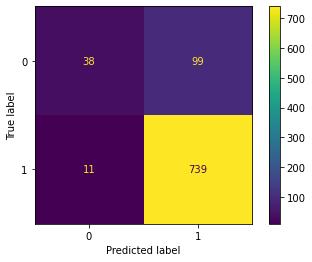

In [59]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

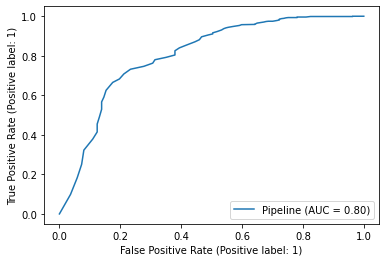

In [60]:
RocCurveDisplay.from_estimator( rfc_pipe, X_test, y_test )

Comparing this baseline random forest model with dummy model, this one performs much better with an accuracy of 0.875
and an AUC score of 0.80. However, the recall score indicates that it's only to predict negative tweets at 28% correctly. This model can predict the positive tweets at 99% correct. Will tune the model to see if we can improve these scores.

# Perform GridSearch on random forest

In [65]:
params = {}
params['rfc__criterion'] = ['gini', 'entropy']
params['rfc__max_depth'] = [10, 20, None]
params['rfc__min_samples_leaf'] = [1,2,3]
params['vectorizer__norm']: ['l1','l2']


gs_rfc = GridSearchCV(estimator= rfc_pipe,
                 param_grid=params,
                 scoring='recall_macro',
                 n_jobs = 2,
                 verbose= 3)


In [66]:
gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                                    'your',
                                                                    'yours',
                                                                    'yourself',
                                                                    'yourselves',
                                                                    'he', 'him',
                                                                    'his',
                                                                    'himself',
                                                                    'she',
                                                                    "she's",
                                                                    'her',
                                                                    'hers',
                                                                    'herself',
                                                                    'it',
                                                                    "it's",
                                                                    'its',
                                                                    'itself', ...],
                                                        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7facefac7700>>)),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy=1)),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=2,
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_depth': [10, 20, None],
                         'rfc__min_samples_leaf': [1, 2, 3]},
             scoring='recall_macro', verbose=3)

In [67]:
gs_rfc.best_params_

{'rfc__criterion': 'gini', 'rfc__max_depth': None, 'rfc__min_samples_leaf': 3}

Random Forest with best parameters:

In [72]:
rfc_best_pipe = ImPipeline([('vectorizer', TfidfVectorizer(tokenizer=tokenizer.tokenize, 
                                                    stop_words=stop_lst)), # NLP preprocessing: tokenize, remove stopwords, punctunations, lowercase
                     ('smote', SMOTE(sampling_strategy = 1, random_state = 42)), # use SMOTE to get 1:1 ratio for both classes
                     ('rfc', RandomForestClassifier(criterion = 'gini',
                                                    max_depth = None,
                                                    min_samples_leaf = 3,
                                                    random_state = 42))]) # revised based on best_params

rfc_best_pipe.fit(X_train, y_train) 

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7facefac7700>>)),
                ('smote', SMOTE(random_state=42, sampling_strategy=1)),
                ('rfc',
                 RandomForestClassifier(min_samples_leaf=3, random_state=42))])

In [73]:
y_pred = rfc_best_pipe.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39       137
           1       0.88      0.96      0.92       750

    accuracy                           0.86       887
   macro avg       0.73      0.63      0.66       887
weighted avg       0.84      0.86      0.84       887



The recall for predicting positive and negative do not increase much with the gripsearch.

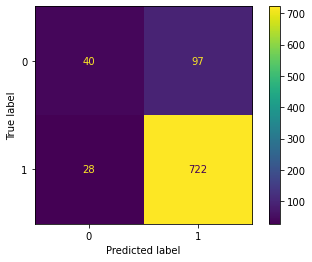

In [74]:
cm3 = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.show()


This model increase false negatives or it predicts more false negative reviews.

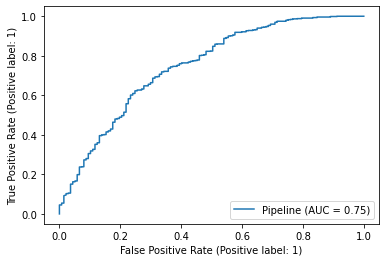

In [75]:
RocCurveDisplay.from_estimator( rfc_best_pipe, X_test, y_test )

AUC 0.75 is less than the baseline random forest model.

# 1st logistic regression model